# Customer Chrurn Prediction
* Classification metrics - Accuracy, F1-Score
* Steps: 
    1. Data loading - Done
    2. EDA - Done (Rem - correlation and feature analysis)
    3. Data splitting and preparation - Done
    4. Model Selection training - Logistic Regression and Random Forest
    5. Model testing - Done

In [1]:
import pandas as pd
import numpy as np

### Data loading

In [2]:
df=pd.read_csv("Churn-Data.csv")
df.head()

,cID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,TV_Streaming,Movie_Streaming,Contract,PaperlessBilling,Method_Payment,Charges_Month,TotalCharges,Churn
0,4223-BKEOR,Female,0,No,Yes,21,Yes,No,DSL,Yes,...,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.8,No
1,6035-RIIOM,Female,0,No,No,54,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45,No
2,3797-VTIDR,Male,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45,Yes
3,2568-BRGYX,Male,0,No,No,4,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95,Yes
4,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cID               5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  TV_Streaming      5634 non-null   object 
 14  Movie_Streaming   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [4]:
df.nunique()

cID                 5634
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
TV_Streaming           3
Movie_Streaming        3
Contract               3
PaperlessBilling       2
Method_Payment         4
Charges_Month       1495
TotalCharges        5300
Churn                  2
dtype: int64

In [5]:
df['Churn'].value_counts()

No     4138
Yes    1496
Name: Churn, dtype: int64

In [6]:
df.isna().sum()

cID                 0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
TV_Streaming        0
Movie_Streaming     0
Contract            0
PaperlessBilling    0
Method_Payment      0
Charges_Month       0
TotalCharges        0
Churn               0
dtype: int64

### There are no missing values in our dataset, but there is a need to convert categorical variables/columns to numbers

In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Label encode binary categorical columns
binary_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
le = LabelEncoder()
for col in binary_columns:
    df[col] = le.fit_transform(df[col])

# One-hot encode categorical columns with more than two categories
categorical_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                       'DeviceProtection', 'TechSupport', 'TV_Streaming', 'Movie_Streaming', 
                       'Contract', 'Method_Payment']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Check the resulting dataframe
print(df.head())


          cID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  4223-BKEOR       0              0        0           1      21   
1  6035-RIIOM       0              0        0           0      54   
2  3797-VTIDR       1              0        1           0       1   
3  2568-BRGYX       1              0        0           0       4   
4  2775-SEFEE       1              0        0           1       0   

   PhoneService  PaperlessBilling  Charges_Month TotalCharges  ...  \
0             1                 0          64.85       1336.8  ...   
1             1                 1          97.20      5129.45  ...   
2             0                 1          23.45        23.45  ...   
3             1                 1          70.20       237.95  ...   
4             1                 1          61.90               ...   

   TechSupport_Yes  TV_Streaming_No internet service  TV_Streaming_Yes  \
0                0                                 0                 0   
1               

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   cID                                     5634 non-null   object 
 1   gender                                  5634 non-null   int32  
 2   SeniorCitizen                           5634 non-null   int64  
 3   Partner                                 5634 non-null   int32  
 4   Dependents                              5634 non-null   int32  
 5   tenure                                  5634 non-null   int64  
 6   PhoneService                            5634 non-null   int32  
 7   PaperlessBilling                        5634 non-null   int32  
 8   Charges_Month                           5634 non-null   float64
 9   TotalCharges                            5634 non-null   object 
 10  Churn                                   5634 non-null   int3

In [9]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   cID                                     5634 non-null   object 
 1   gender                                  5634 non-null   int32  
 2   SeniorCitizen                           5634 non-null   int64  
 3   Partner                                 5634 non-null   int32  
 4   Dependents                              5634 non-null   int32  
 5   tenure                                  5634 non-null   int64  
 6   PhoneService                            5634 non-null   int32  
 7   PaperlessBilling                        5634 non-null   int32  
 8   Charges_Month                           5634 non-null   float64
 9   TotalCharges                            5624 non-null   float64
 10  Churn                                   5634 non-null   int3

### Total charges seems to contain 10 NaN values, we need to fix that

In [11]:
df['TotalCharges'].fillna(0, inplace=True)
df['TotalCharges']

0       1336.80
1       5129.45
2         23.45
3        237.95
4          0.00
         ...   
5629      95.00
5630    2198.30
5631     306.05
5632    1200.15
5633     457.30
Name: TotalCharges, Length: 5634, dtype: float64


5. Are there any strong positive or negative correlations between variables.
6. Which variable has most significant impact on the target variable.


In [12]:

numeric_df = df[['Charges_Month','TotalCharges','tenure']]

# Descriptive statistics for numeric columns
desc_stats = numeric_df.describe()
print(desc_stats)

# Range calculation for numeric columns
range_values = numeric_df.max() - numeric_df.min()
print('Range of each numeric feature:')
print(range_values)

       Charges_Month  TotalCharges       tenure
count    5634.000000   5634.000000  5634.000000
mean       64.864253   2287.087948    32.373092
std        30.089324   2263.197899    24.424539
min        18.250000      0.000000     0.000000
25%        35.750000    406.275000     9.000000
50%        70.525000   1405.650000    29.000000
75%        89.937500   3806.612500    55.000000
max       118.600000   8684.800000    72.000000
Range of each numeric feature:
Charges_Month     100.35
TotalCharges     8684.80
tenure             72.00
dtype: float64


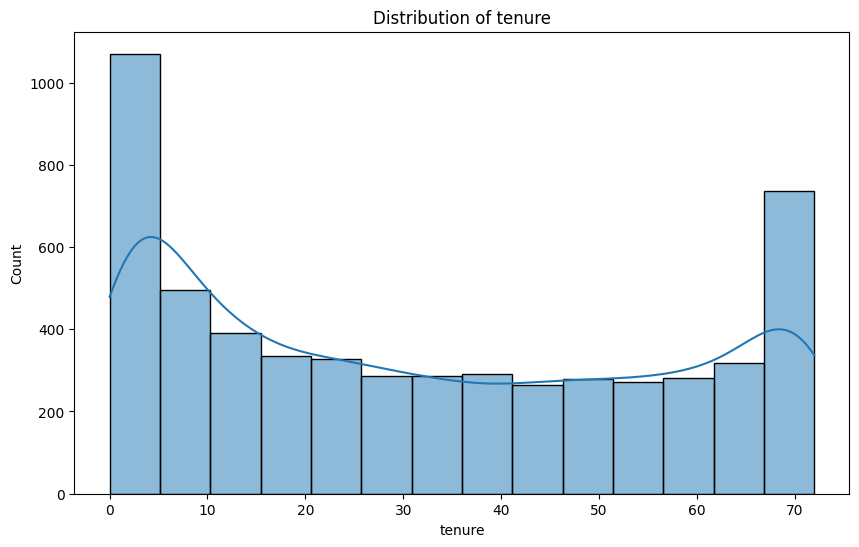

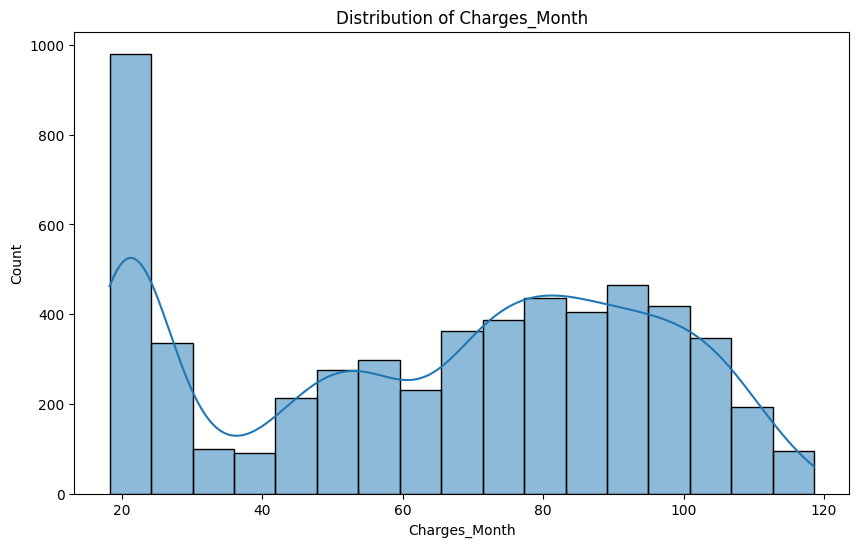

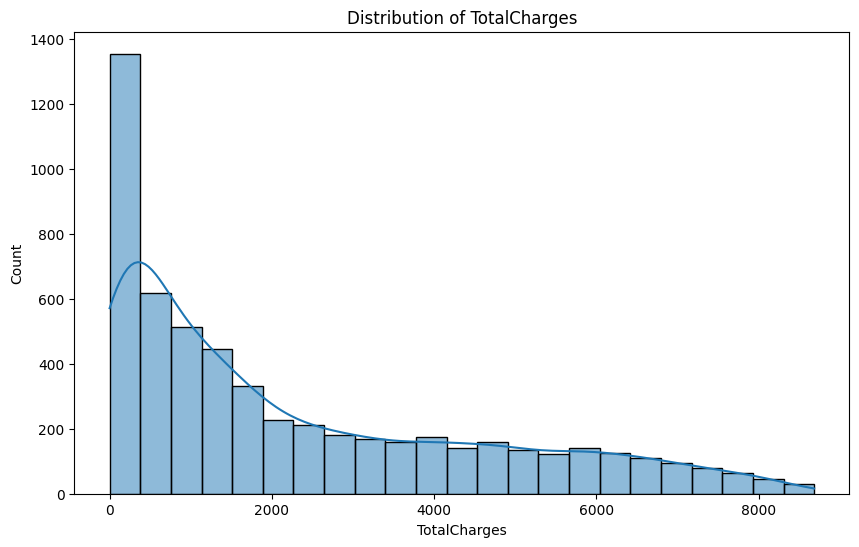

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
for column in ['tenure', 'Charges_Month', 'TotalCharges']:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

###  Understanding distribution

* TotalCharges Distribution: The histogram shows that many customers have low TotalCharges, with a significant number of customers having charges close to zero. This could indicate a large proportion of new customers. The distribution is right-skewed, indicating that while most customers have lower charges, a few have very high charges.

* Charges_Month Distribution: The histogram indicates a somewhat uniform distribution with peaks at various intervals. A significant number of customers are at the lower end of the monthly charges spectrum, and there are smaller peaks at various points, suggesting a diverse customer base in terms of monthly spending.

* Tenure Distribution: The histogram shows a high number of customers with very low tenure (new customers) and another peak at the higher end, indicating long-term customers. The distribution is bimodal, suggesting two distinct groups: new customers and long-term customers.

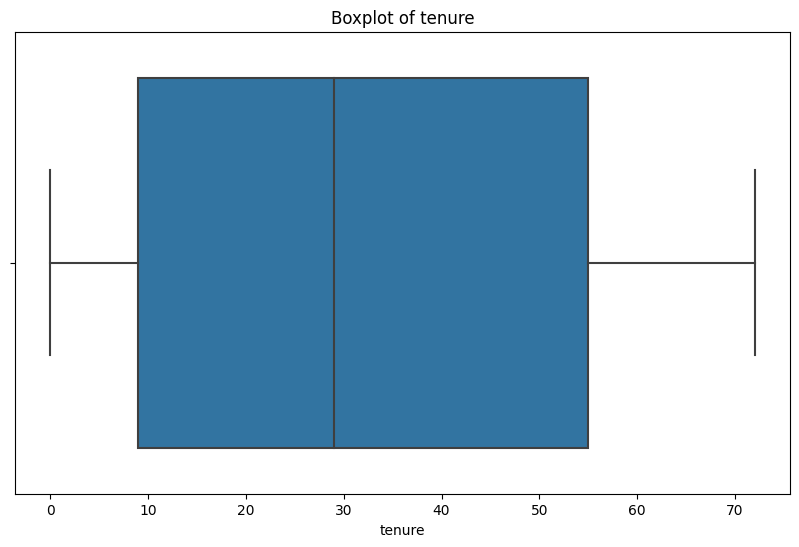

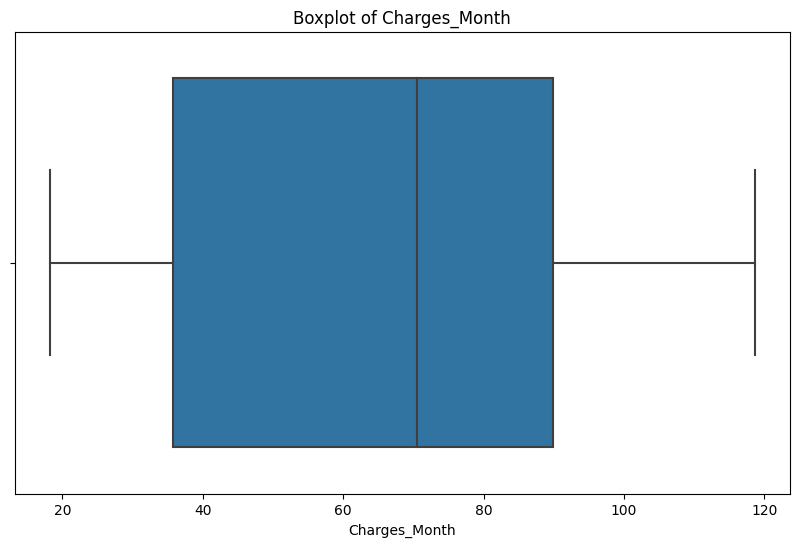

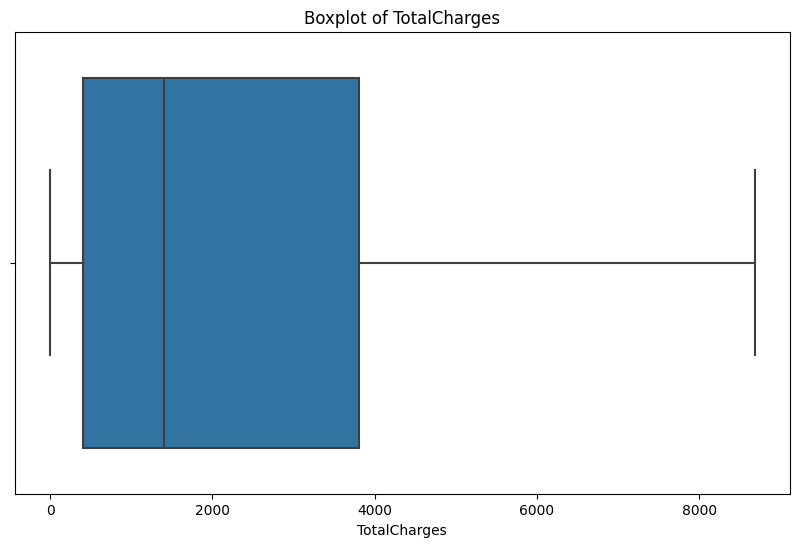

In [14]:
# Plot boxplots to identify outliers
for column in ['tenure', 'Charges_Month', 'TotalCharges']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


C:\Users\Ajinkya\AppData\Local\Temp\ipykernel_16720\2225687574.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


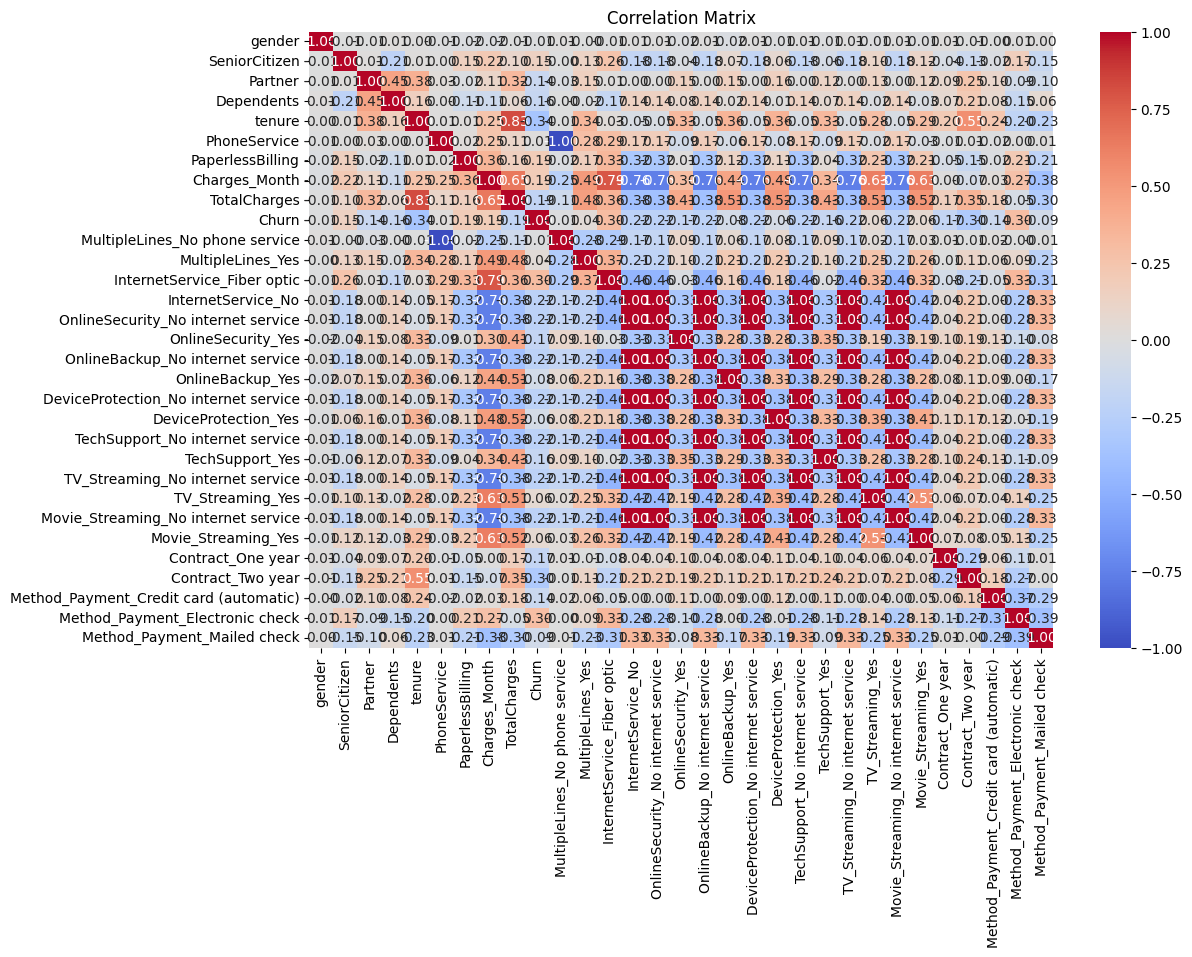

In [15]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

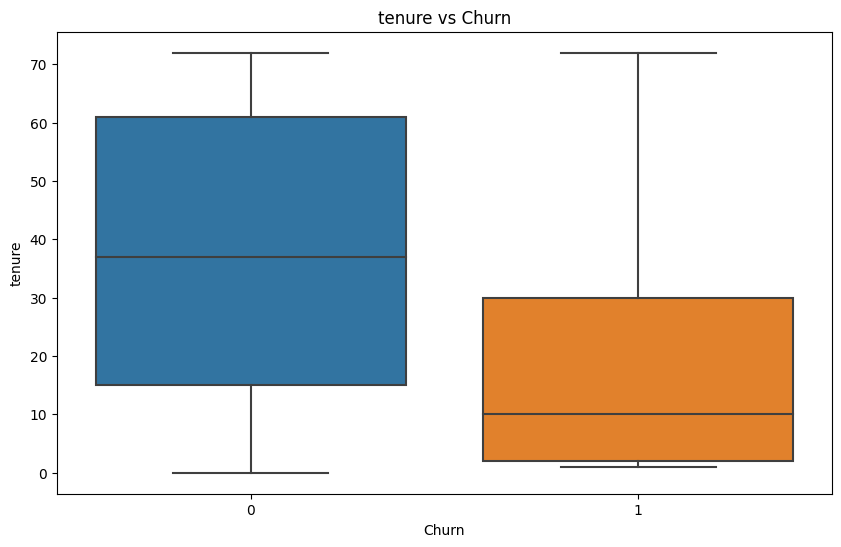

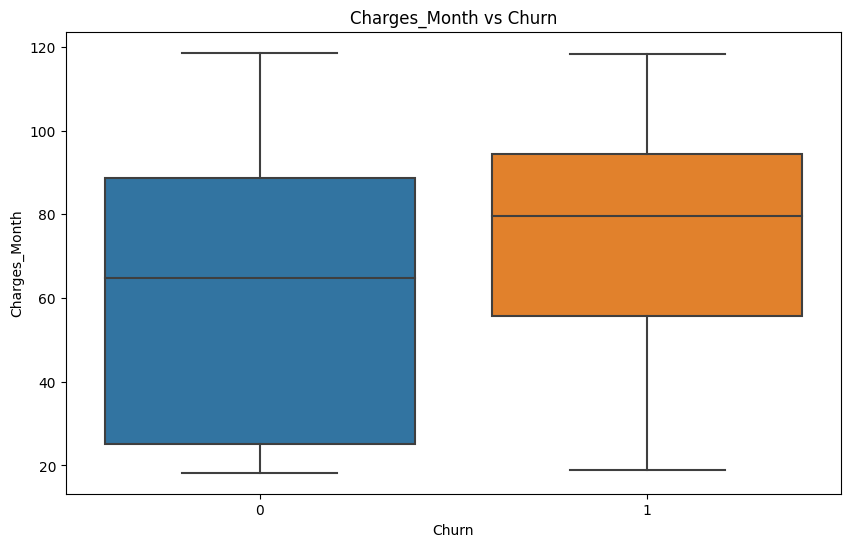

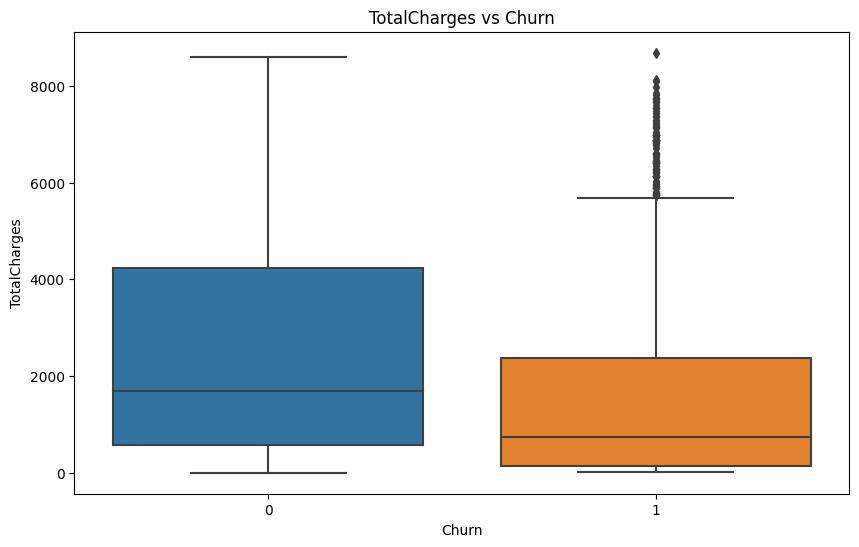

Churn                                     1.000000
InternetService_Fiber optic               0.301355
Method_Payment_Electronic check           0.296304
PaperlessBilling                          0.191324
Charges_Month                             0.188574
SeniorCitizen                             0.147078
Movie_Streaming_Yes                       0.064794
TV_Streaming_Yes                          0.060134
MultipleLines_Yes                         0.036194
PhoneService                              0.008886
MultipleLines_No phone service           -0.008886
gender                                   -0.011729
DeviceProtection_Yes                     -0.063291
OnlineBackup_Yes                         -0.081422
Method_Payment_Mailed check              -0.092425
Method_Payment_Credit card (automatic)   -0.135167
Partner                                  -0.142266
Dependents                               -0.162356
TechSupport_Yes                          -0.162722
OnlineSecurity_Yes             

In [16]:
# Visualize relationships between numerical features and Churn
for column in ['tenure', 'Charges_Month', 'TotalCharges']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Churn', y=df[column], data=df)
    plt.title(f'{column} vs Churn')
    plt.show()

# Calculate correlation with Churn
print(correlation_matrix['Churn'].sort_values(ascending=False))


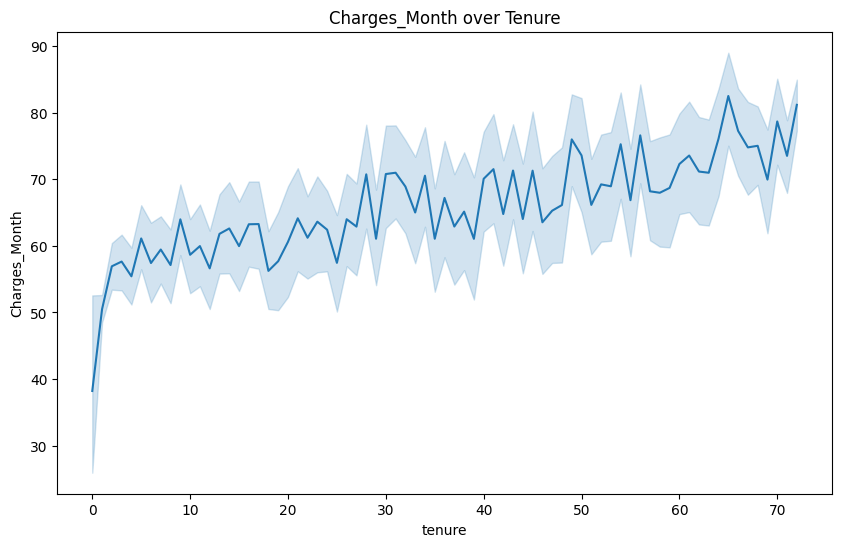

In [17]:
# If tenure can be considered a time series
plt.figure(figsize=(10, 6))
sns.lineplot(x='tenure', y='Charges_Month', data=df)
plt.title('Charges_Month over Tenure')
plt.show()


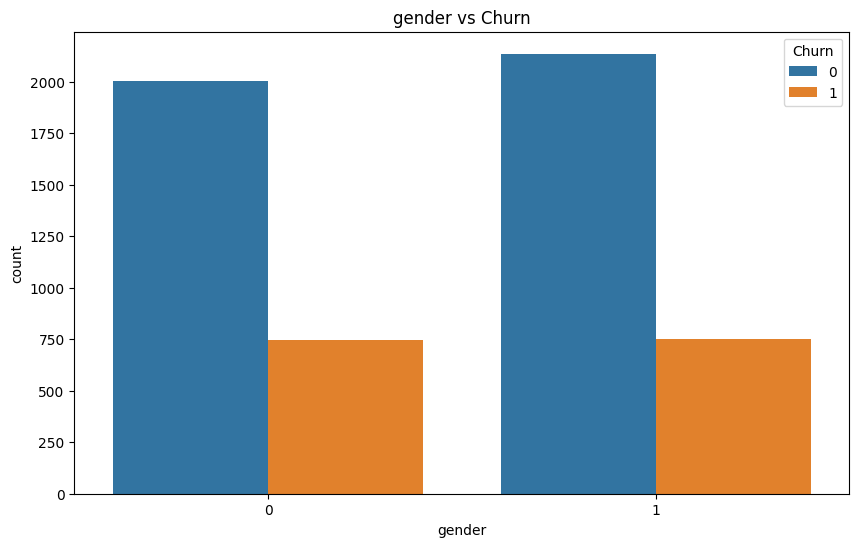

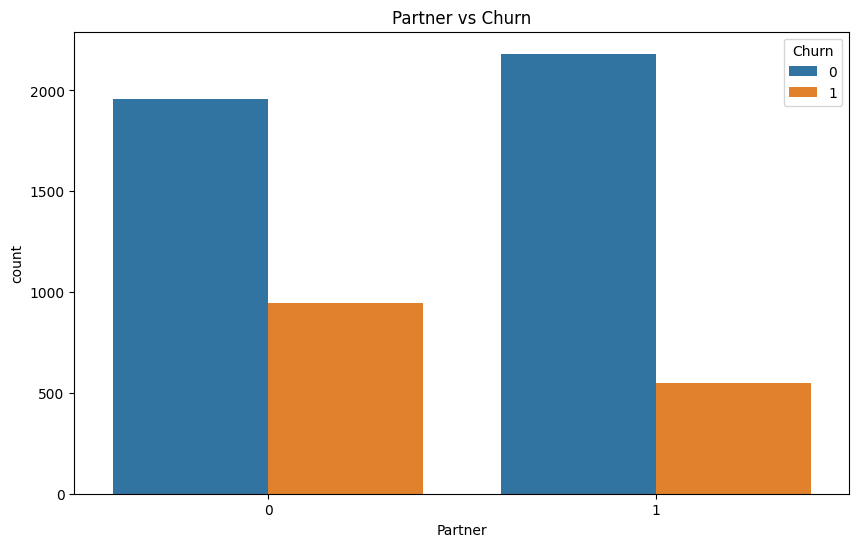

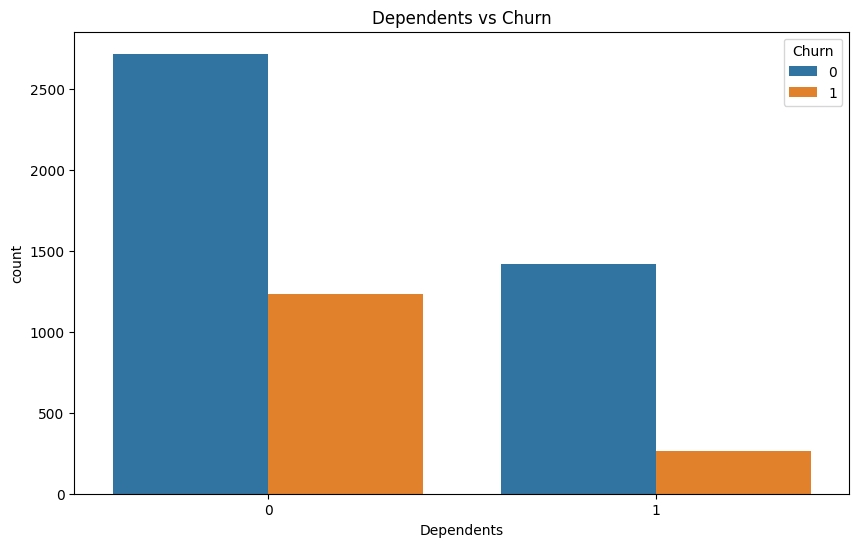

ValueError: Could not interpret input 'Contract'

<Figure size 1000x600 with 0 Axes>

In [18]:
# Visualize variation across categories
for column in ['gender', 'Partner', 'Dependents', 'Contract']:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, hue='Churn', data=df)
    plt.title(f'{column} vs Churn')
    plt.show()


### Data splitting

In [20]:
#Split into X and y
from sklearn.model_selection import train_test_split

X=df.drop(["cID","Churn"],axis=1)
y=df["Churn"]

#Split into train and test
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [21]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((4507, 30), (1127, 30), (4507,), (1127,))

In [22]:
#Models from Sci-Kit learn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#Model Evaluations
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score

### Model building, Fitting, Testing - GridSearchCV Logistic regression (No SMOTE used)
* {'C': 0.008531678524172805,
  'max_iter': 1000,
  'penalty': 'l2',
  'solver': 'liblinear'}
* accuracy - 0.7950310559006211
* Precision: 0.67
* Recall: 0.49
* F1 Score: 0.56

In [23]:
# Different Hyperparameters for LR model
log_reg_grid = {
    'C': [0.008531678524172805],
    'solver': ['liblinear'],
    'penalty': ['l2'],
    'max_iter': [1000,1200,1500]
}

# Setup grid Hyperparamter search for logistic Regression()
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose = True) #difference in parameter and no n_iter coz gridsearch cv tries every single combo

#Fit our grid Hyperparameter search model
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.008531678524172805],
                         'max_iter': [1000, 1200, 1500], 'penalty': ['l2'],
                         'solver': ['liblinear']},
             verbose=True)

In [24]:
# Check the best hyper-parameters
gs_log_reg.best_params_

{'C': 0.008531678524172805,
 'max_iter': 1000,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [25]:
# Evaluate the grid search logistic regression model
LR_score = gs_log_reg.score(X_test,y_test)
LR_score

0.7950310559006211

In [26]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

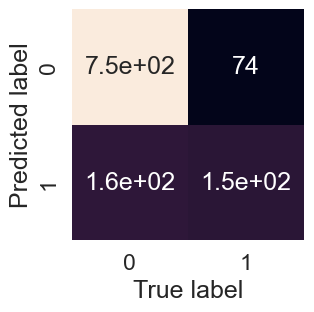

In [27]:
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test,y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot=True, cbar = False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    
plot_conf_mat(y_test,y_preds)

In [28]:
y_preds

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
print(classification_report(y_test,y_preds)) #Calculated using Only one split 

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       822
           1       0.67      0.49      0.56       305

    accuracy                           0.80      1127
   macro avg       0.75      0.70      0.71      1127
weighted avg       0.78      0.80      0.78      1127



In [32]:
# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_preds)
recall = recall_score(y_test, y_preds)
f1 = f1_score(y_test, y_preds)

# Print the scores
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Precision: 0.67
Recall: 0.49
F1 Score: 0.56


### Applying SMOTE

In [34]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_test = scaler.transform(X_test)

In [38]:
y_train_smote.value_counts()

0    3316
1    3316
Name: Churn, dtype: int64

### Model building, Fitting, Testing - CV Logistic regression (SMOTE used)
* Precision: 0.58
* Recall: 0.65
* F1 Score: 0.61
* Accuracy: 0.78

In [41]:
# Different Hyperparameters for LR model
log_reg_grid = {
    'C': [0.008531678524172805],
    'solver': ['liblinear'],
    'penalty': ['l2'],
}

# Setup grid Hyperparamter search for logistic Regression()
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose = True) #difference in parameter and no n_iter coz gridsearch cv tries every single combo

#Fit our grid Hyperparameter search model
gs_log_reg.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred = model.predict(X_test)
LR_score = model.score(X_test,y_test)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the scores
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {LR_score:.2f}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Precision: 0.58
Recall: 0.65
F1 Score: 0.61
Accuracy: 0.78


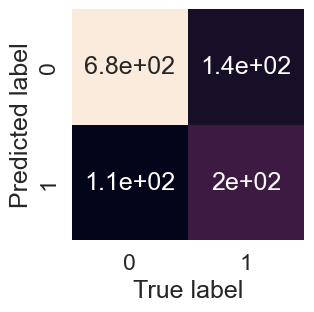

In [42]:
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test,y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot=True, cbar = False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    
plot_conf_mat(y_test,y_pred)

In [43]:
print(classification_report(y_test,y_pred)) #Calculated using Only one split 

              precision    recall  f1-score   support

           0       0.86      0.83      0.85       822
           1       0.58      0.65      0.61       305

    accuracy                           0.78      1127
   macro avg       0.72      0.74      0.73      1127
weighted avg       0.79      0.78      0.78      1127



### Applying SMOTE has balanced the dataset and improved the model's ability to correctly identify the minority class (Class 1), though with a slight decrease in overall accuracy and performance on the majority class. This trade-off is generally acceptable in imbalanced datasets as it leads to a more balanced and fair model performance across classes.

### Building, fitting, testing - Random Forest on imbalanced data (Grid search CV)
* {'max_depth': 10,
  'min_samples_leaf': 4,
  'min_samples_split': 2,
  'n_estimators': 200}
* Precision: 0.73
* Recall: 0.33
* F1 Score: 0.45
* Accuracy: 0.79
 

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Training on imbalanced data
X_train = scaler.fit_transform(X_train)
rf_imbalanced = RandomForestClassifier(random_state=42)


grid = {"n_estimators":[10,100,200,500,1000,1200],
       "max_depth":[None,5,10,20,30],
       "min_samples_split":[2,4,6],
       "min_samples_leaf":[1,2,4]}


gs_model = GridSearchCV(rf_imbalanced,grid,cv = 5,verbose=2)

gs_model.fit(X_train, y_train)
y_pred_imbalanced = gs_model.predict(X_test)

print("Classification Report (Imbalanced Data):")
print(classification_report(y_test, y_pred_imbalanced))


Fitting 5 folds for each of 270 candidates, totalling 1350 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_d

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   2.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   4.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   4.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   4.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   4.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   4.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   5.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   6.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   5.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=6,

[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   2.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   2.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   2.5s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=6, n_estim

[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=4, n_estimators=1200; total time=   5.4s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=6, n_estimator

[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   2.8s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   2.8s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   2.8s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   2.9s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   2.8s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   3.5s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   3.6s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   3.6s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   3.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total tim

[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   1.3s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   1.3s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   1.3s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   1.3s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   1.3s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   2.8s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   2.8

[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.4s


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   5.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   4.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   5.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=

[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   2.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   4.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   4.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   4.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   4.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   4.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   4.9s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   4.8s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   4.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; 

[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   1.9s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   1.9s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   1.9s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   1.9s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total tim

[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=

[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   4.8s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   5.7s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   5.7s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   5.8s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   5.8s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   5.9s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total t

[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   2.2s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   2.4s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   2.2s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   2.2s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   4.8s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   4.4s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   4.5s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   4.6s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   4.6s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; tot

[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.8s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.8s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.8s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.7s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.8s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   2.0s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total tim

[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   6.2s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   6.2s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.4s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.4s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time= 

[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   4.6s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   4.7s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   4.9s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   4.6s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   4.6s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=   5.5s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=   5.7s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=   5.6s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=4, n_estimators=1200; total time=   5.8s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=4, n_estimators=1200;

[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.8s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.7s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.8s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.8s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   2.0s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   2.1s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   2.1s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   2.0s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   2.1s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total ti

In [53]:
y_pred = gs_model.predict(X_test)
rf_score = gs_model.score(X_test,y_test)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the scores
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {rf_score:.2f}")

Precision: 0.73
Recall: 0.33
F1 Score: 0.45
Accuracy: 0.79


In [54]:
gs_model.best_params_

{'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 200}

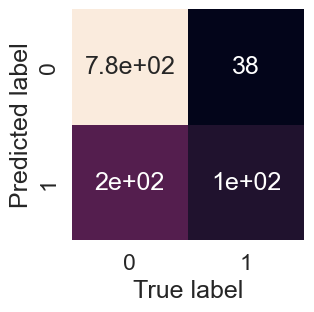

In [52]:
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test,y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot=True, cbar = False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    
plot_conf_mat(y_test,y_pred_imbalanced)

### Building, fitting, testing - Random Forest on balanced data (CV)¶

* Precision: 0.58
* Recall: 0.69
* F1 Score: 0.63
* Accuracy: 0.78

In [55]:

grid = {"n_estimators":[200],
       "max_depth":[10],
       "min_samples_split":[2],
       "min_samples_leaf":[4]}

# Training on SMOTE-balanced data
rf_smote = RandomForestClassifier(random_state=42)
gs_model = GridSearchCV(rf_smote,grid,cv = 5,verbose=2)
gs_model.fit(X_train_smote, y_train_smote)
y_pred_smote = gs_model.predict(X_test)

print("Classification Report (SMOTE Data):")
print(classification_report(y_test, y_pred_smote))


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.1s
Classification Report (SMOTE Data):
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       822
           1       0.58      0.69      0.63       305

    accuracy                           0.78      1127
   macro avg       0.73      0.75      0.74      1127
weighted avg       0.80      0.78      0.79      1127



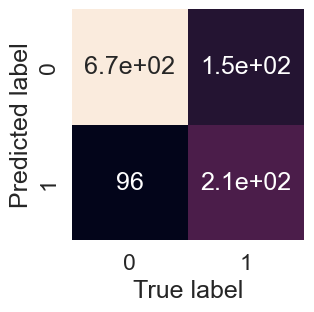

In [56]:
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test,y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot=True, cbar = False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    
plot_conf_mat(y_test,y_pred_smote)

In [57]:

rf_score = gs_model.score(X_test,y_test)
# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_smote)
recall = recall_score(y_test, y_pred_smote)
f1 = f1_score(y_test, y_pred_smote)

# Print the scores
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {rf_score:.2f}")

Precision: 0.58
Recall: 0.69
F1 Score: 0.63
Accuracy: 0.78


### Conclusion and Results

<AxesSubplot: >

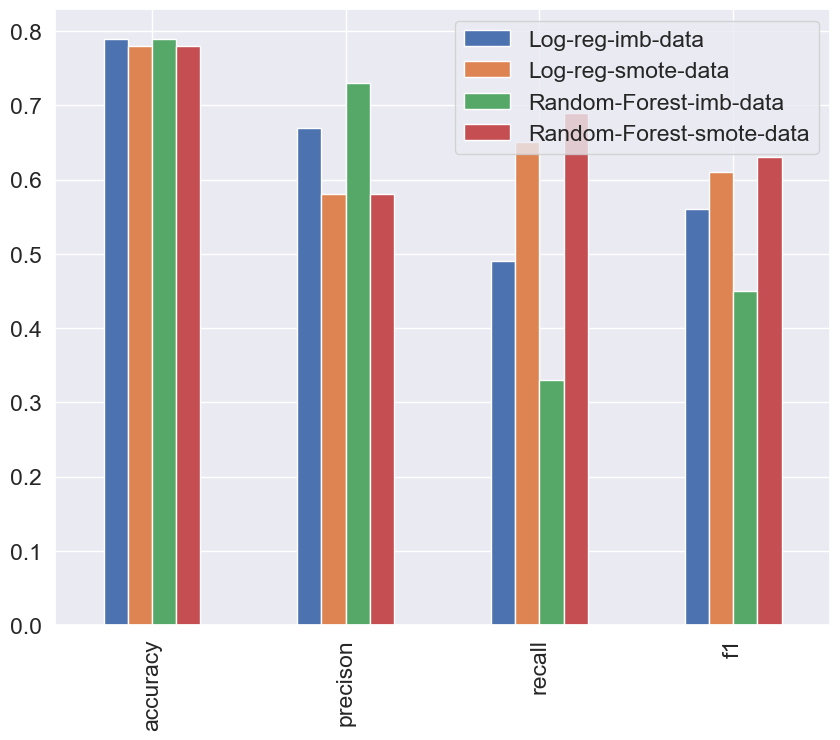

In [59]:
one = {"accuracy":0.79,
               "precison":0.67,
               "recall": 0.49,
               "f1":0.56}

two = {"accuracy":0.78,
               "precison":0.58,
               "recall": 0.65,
               "f1":0.61}

three = {"accuracy":0.79,
               "precison":0.73,
               "recall": 0.33,
               "f1":0.45}

four = {"accuracy":0.78,
               "precison":0.58,
               "recall": 0.69,
               "f1":0.63}

compare_metrics = pd.DataFrame({"Log-reg-imb-data":one,
                               "Log-reg-smote-data":two,
                               "Random-Forest-imb-data":three,
                               "Random-Forest-smote-data":four})
compare_metrics.plot.bar(figsize = (10,8))